<a href="https://colab.research.google.com/github/as9786/ComputerVision/blob/main/Inpainting/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train1 = x_train.astype('float32')/255.0
x_test1 = x_test.astype('float32')/255.0
x_train = x_train1.reshape((60000,28*28))
x_test = x_test1.reshape((10000,28*28))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Autoencoder 구축

In [ ]:
input_size = 784
hidden_size = 128
code_size = 32

# Encoder
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size,activation='relu')(input_img)
code = Dense(code_size,activation='relu')(hidden_1)

#Decoder
hidden_2 = Dense(hidden_size,activation='relu')(code)
output_img = Dense(input_size,activation='sigmoid')(hidden_2)

autoencoder = Model(input_img,output_img)

In [ ]:
 autoencoder.compile(optimizer='adam',loss='mse')
 autoencoder.fit(x_train,x_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0256
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0130
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111


In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
decoded_imgs = decoded_imgs.reshape((10000,28,28))

In [ ]:
decoded_imgs.shape

(10000, 28, 28)

# 원래 이미지와 복원된 이미지 비교

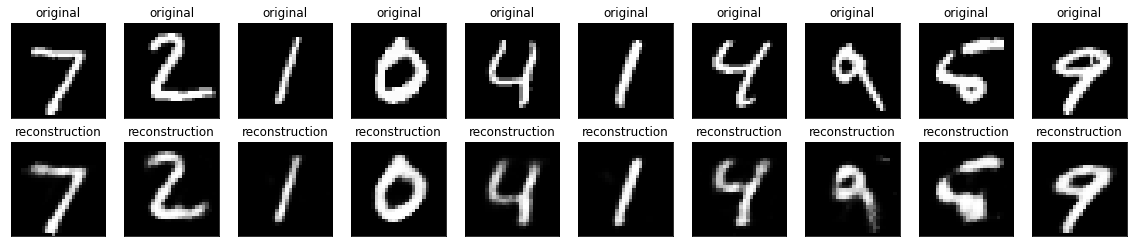

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test1[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title('reconstruction')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#저차원 벡터(representation vector)를 이용한 분류

In [ ]:
encoder = Model(inputs=input_img,outputs=code) 

In [ ]:
#encoder
X_train_encode = encoder.predict(x_train)
#encoder the test data
X_test_encode = encoder.predict(x_test)

In [ ]:
X_train_encode.shape

(60000, 32)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(Dense(128,activation='relu',input_shape=(X_train_encode.shape[1],)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               4224      
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 5,514
Trainable params: 5,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [ ]:
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_encode,y_train_one_hot,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.7356 - accuracy: 0.7733 - val_loss: 0.3492 - val_accuracy: 0.8958
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8902 - val_loss: 0.2822 - val_accuracy: 0.9149
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2956 - accuracy: 0.9089 - val_loss: 0.2448 - val_accuracy: 0.9292
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.9234 - val_loss: 0.2252 - val_accuracy: 0.9332
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2200 - accuracy: 0.9339 - val_loss: 0.1868 - val_accuracy: 0.9457
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9409 - val_loss: 0.1764 - val_accuracy: 0.9500
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1784 - accuracy: 0.9456 - val_loss: 0.1662 - val_accuracy: 0.9521
Epoch 